## Logistic Regression

In [765]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [766]:
class LogisticRegressor:
    def __init__(self) -> None:
        self.theta = None

    def sigmoid(self, z: np.array) -> np.array:
        """Generates Sigmoid function array of input array

        Args:
            z (np.array): Input values

        Returns:
            np.array: Output of Sigmoid function
        """
        return 1/(1 + np.exp(-z))
    

    def bce_loss(self, y: np.array, y_pred: np.array)->float:
        """Calculate Binray Cross Entropy Loss

        Args:
            y (np.array): Actual target vector of shape(m, 1)
            y_pred (np.array): Predicted target vector of shape (m, 1)

        Returns:
            float: BCE LOSS
        """
        
        m = y.shape[0]
        loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).sum() / (m)
        
        return loss
    
    def R2_score(self, y: np.array, y_pred: np.array) -> float:
        """Calculate R2 Score

        Args:
            y (np.array): Actual target vector of shape(m, 1)
            y_pred (np.array): Predicted target vector of shape (m, 1)

        Returns:
            float: R2 Score
        """
        R2 = 1 - (((y_pred - y)**2).sum() / (((y - y.mean())**2).sum()))
        return R2

    def calculate_gradients(self, X: np.array, y: np.array, y_pred: np.array)->np.array:
        """Calculate the gradient array of BCE loss

        Args:
            X (np.array): Feature matrix of shape (m, n) where m = number of rows/data samples and n = number of columns/features
            y (np.array): Actual target vector of shape (m, 1)
            y_pred (np.array): Predicted target vector of shape (m, 1)

        Returns:
            np.array: Gradient array
        """
        m = y.shape[0]
        n = X.shape[1]

        gradient = np.zeros((1, n+1))
        
        new_dimension = np.ones((X.shape[0],1))
        X_train = np.hstack((new_dimension, X))

        gradient = ((y_pred - y).T @ X_train)/m
        return gradient

    def gradient_descent(self, alpha: float, theta: np.array, gradient: np.array)->np.array:
        """Update the parameters using gradient descent

        Args:
            alpha (float): Learning rate
            theta (np.array): Parameters of model of shae (n+1, 1)
            gradeint (np.array): Gradeints of loss function of shape (1, n+1)

        Returns:
            np.array: Updated value of parameters of shape (n+1, 1)
        """
        theta = theta - alpha * gradient.T
        return theta
        
    def train(self, X_train: np.array,X_val: np.array, y_train: np.array, y_val: np.array, n_iters: int, alpha: float):
        """Train through given datas for n iterations

        Args:
            X_train (np.array): Feature matrix of shape (m, n) where m = number of rows/data samples and n = number of columns/features
            X_val (np.array): Validation set
            y (np.array): Target vector of shape (m, 1)
            n_iters (int): Number of times to iterate
            alpha (float): Learning rate

        Returns:
            theta, history: (Function parameters, history)
        """
        m = X_train.shape[0]
        n = X_train.shape[1]

        theta = np.zeros((n+1, 1))

        new_dimension = np.ones((m,1))
        X_train_1 = np.hstack((new_dimension, X_train))

        new_dimension = np.ones((X_val.shape[0], 1))
        X_val_1 = np.hstack((new_dimension, X_val))

        history = {
            "loss_train": [],
            "loss_val": [],
            "r2_score" : [],
            "theta": []
        }

        for i in tqdm(range(n_iters)):
            y_pred_train = X_train_1 @ theta
            y_pred_train = self.sigmoid(y_pred_train)
            history["loss_train"].append(self.bce_loss(y_train, y_pred_train))
            # history["r2_score"].append(self.R2_score(y_train, y_pred_train))
            gradient = self.calculate_gradients(X_train,y_train,y_pred_train)
            theta = self.gradient_descent(alpha, theta, gradient)
            history["theta"].append(theta)

            y_pred_val = self.sigmoid(X_val_1 @ theta)
            history["loss_val"].append(self.bce_loss(y_val, y_pred_val))

        # print(y_pred_train)
        self.theta = theta
        return history
    
    def predict(self, X: np.array) -> float:
        """Predicts the value of y using X

        Args:
            X (np.array): Array of features

        Returns:
            float: Predicted values
        """

        X = X.reshape(X.shape[0], -1)
        new_dimension = np.ones((X.shape[0],1))
        X_new = np.hstack((new_dimension, X))

        return self.sigmoid(X_new @ self.theta)

In [767]:
df = pd.read_csv("./train.csv")

In [768]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


Train_Test_Validation spliting

In [769]:
df_train = df.sample(frac=0.6)
df_test = df.drop(df_train.index)
df_val = df_test.sample(frac=0.5, random_state=2)
df_test = df_test.drop(df_val.index)

df.shape, df_train.shape, df_test.shape, df_val.shape

((150, 7), (90, 7), (30, 7), (30, 7))

Normalization of data

In [770]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for column in columns:
    mean = df_train[column].mean()
    std = df_train[column].std()
    df_train[f"{column}_normalized"] = (df_train[column] - mean) / std
    df_val[f"{column}_normalized"] = (df_val[column] - mean) / std
    df_test[f"{column}_normalized"] = (df_test[column] - mean) / std
    df[f"{column}_normalized"] = (df[column] - mean) / std

In [771]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica,sepal_length_normalized,sepal_width_normalized,petal_length_normalized,petal_width_normalized
0,5.1,3.5,1.4,0.2,1,0,0,-0.951909,1.089018,-1.370646,-1.356045
1,4.9,3.0,1.4,0.2,1,0,0,-1.194262,-0.109168,-1.370646,-1.356045
2,4.7,3.2,1.3,0.2,1,0,0,-1.436615,0.370106,-1.427336,-1.356045
3,4.6,3.1,1.5,0.2,1,0,0,-1.557792,0.130469,-1.313955,-1.356045
4,5.0,3.6,1.4,0.2,1,0,0,-1.073085,1.328655,-1.370646,-1.356045


In [772]:
df_train["class_Iris-versicolor"].value_counts() , df_val["class_Iris-versicolor"].value_counts(), df_test["class_Iris-versicolor"].value_counts()

(class_Iris-versicolor
 0    60
 1    30
 Name: count, dtype: int64,
 class_Iris-versicolor
 0    21
 1     9
 Name: count, dtype: int64,
 class_Iris-versicolor
 0    19
 1    11
 Name: count, dtype: int64)

In [773]:
df_train["class_Iris-virginica"].value_counts() , df_val["class_Iris-virginica"].value_counts(), df_test["class_Iris-virginica"].value_counts()

(class_Iris-virginica
 0    59
 1    31
 Name: count, dtype: int64,
 class_Iris-virginica
 0    19
 1    11
 Name: count, dtype: int64,
 class_Iris-virginica
 0    22
 1     8
 Name: count, dtype: int64)

Seperating dataset into two datasets : 0 vs 1,2 and 1 vs 2

In [774]:
columns.append('class_Iris-versicolor')
columns.append('class_Iris-virginica')
columns.append('class_Iris-setosa')

In [775]:
y_train_versicolor = df_train["class_Iris-versicolor"].values.reshape(-1, 1)
y_train_virginica = df_train["class_Iris-virginica"].values.reshape(-1, 1)
y_train_setosa = df_train["class_Iris-setosa"].values.reshape(-1, 1)
X_train = df_train.drop(columns, axis=1).values
y_val_versicolor = df_val["class_Iris-versicolor"].values.reshape(-1, 1)
y_val_virginica = df_val["class_Iris-virginica"].values.reshape(-1, 1)
y_val_setosa = df_val["class_Iris-setosa"].values.reshape(-1, 1)
X_val = df_val.drop(columns, axis=1).values

Creating test sets

In [776]:
# y_test_versicolor = df_test["class_Iris-versicolor"].values.reshape(-1, 1)
# y_test_virginica = df_test["class_Iris-virginica"].values.reshape(-1, 1)

# y_test = y_test_versicolor*1 + y_test_virginica*2    # 0 represents setosa, 1 represents versicolor and 2 represents virginica

# X_test = df_test.drop(columns, axis=1).values

# y_train_versicolor.shape, y_train_virginica.shape, y_train_setosa.shape, X_train.shape, y_val_versicolor.shape, y_val_virginica.shape, y_val_setosa.shape, X_val.shape

In [777]:
y_test_versicolor = df["class_Iris-versicolor"].values.reshape(-1, 1)
y_test_virginica = df["class_Iris-virginica"].values.reshape(-1, 1)

y_test = y_test_versicolor*1 + y_test_virginica*2    # 0 represents setosa, 1 represents versicolor and 2 represents virginica

X_test = df.drop(columns, axis=1).values

In [778]:
y_test.shape

(150, 1)

In [779]:
model_versicolor = LogisticRegressor()
model_virginica = LogisticRegressor()
model_setosa = LogisticRegressor()

n_iters = 2500
alpha = 0.01

history_versicolor = model_versicolor.train(X_train, X_val, y_train_versicolor, y_val_versicolor, n_iters, alpha)
history_virginica = model_virginica.train(X_train, X_val, y_train_virginica, y_val_virginica, n_iters, alpha)
history_setosa = model_setosa.train(X_train, X_val, y_train_setosa, y_val_setosa, n_iters, alpha)

100%|██████████| 2500/2500 [00:00<00:00, 27779.94it/s]


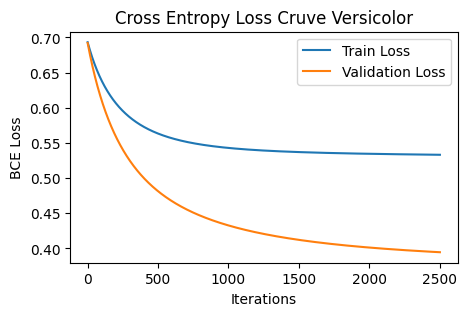

In [780]:
fig=plt.figure(figsize=(5, 3))
counts=np.linspace(1, n_iters, n_iters)
plt.plot(counts, history_versicolor["loss_train"], label="Train Loss")
plt.plot(counts, history_versicolor["loss_val"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("BCE Loss")
plt.title("Cross Entropy Loss Cruve Versicolor")
plt.legend()
plt.show()

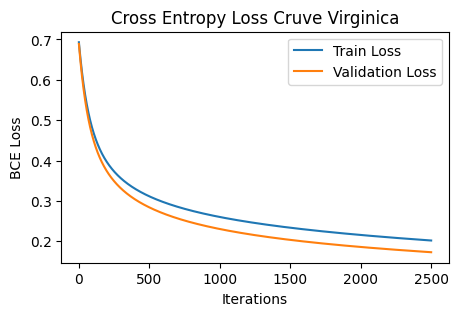

In [781]:
fig=plt.figure(figsize=(5, 3))
counts=np.linspace(1, n_iters, n_iters)
plt.plot(counts, history_virginica["loss_train"], label="Train Loss")
plt.plot(counts, history_virginica["loss_val"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("BCE Loss")
plt.title("Cross Entropy Loss Cruve Virginica")
plt.legend()
plt.show()

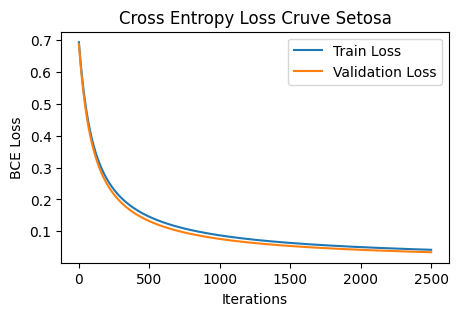

In [782]:
fig=plt.figure(figsize=(5, 3))
counts=np.linspace(1, n_iters, n_iters)
plt.plot(counts, history_setosa["loss_train"], label="Train Loss")
plt.plot(counts, history_setosa["loss_val"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("BCE Loss")
plt.title("Cross Entropy Loss Cruve Setosa")
plt.legend()
plt.show()

Versicolor has high BCE LOSS so ignoring that model

In [783]:
p0 = model_setosa.predict(X_test)
p1 = np.ones((X_test.shape[0], 1), dtype=int)
p2 = model_virginica.predict(X_test)

In [790]:
threshold = 0.5

In [791]:
y_pred =  p1 - np.logical_and(p0>threshold, p0>p2) + np.logical_and(p2>threshold, p2>p0)

## Accuracy Precision Recall and F1 Score

In [792]:
tp0 = np.sum(np.logical_and(y_pred==0, y_test==0))
tp1 = np.sum(np.logical_and(y_pred==1, y_test==1))
tp2 = np.sum(np.logical_and(y_pred==2, y_test==2))

tn0 = np.sum(np.logical_and(y_pred!=0, y_test!=0))
tn1 = np.sum(np.logical_and(y_pred!=1, y_test!=1))
tn2 = np.sum(np.logical_and(y_pred!=2, y_test!=2))

fn0 = np.sum(np.logical_and(y_pred!=0, y_test==0))
fn1 = np.sum(np.logical_and(y_pred!=1, y_test==1))
fn2 = np.sum(np.logical_and(y_pred!=2, y_test==2))

fp0 = np.sum(np.logical_and(y_pred==0, y_test!=0))
fp1 = np.sum(np.logical_and(y_pred==1, y_test!=1))
fp2 = np.sum(np.logical_and(y_pred==2, y_test!=2))

n0 = np.sum(y_test==0)
n1 = np.sum(y_test==1)
n2 = np.sum(y_test==2)

In [793]:
accuracy = (tp0 + tp1 + tp2 + tn0 + tn1 + tn2) / (tp0 + tp1 + tp2 + tn0 + tn1 + tn2 + fp0 + fp1 + fp2 + fn0 + fn1 + fn2)

precision0 = tp0 / (tp0 + fp0) if (tp0 + fp0) > 0 else 0
precision1 = tp1 / (tp1 + fp1) if (tp1 + fp1) > 0 else 0
precision2 = tp2 / (tp2 + fp2) if (tp2 + fp2) > 0 else 0 

precision_macro = (precision0 + precision1 + precision2) / 3
precision_weighted = (n0 * precision0 + n1 * precision1 + n2 * precision2) / (n0 + n1 + n2)

recall0 = tp0 / (tp0 + fn0) if (tp0 + fn0) > 0 else 0
recall1 = tp1 / (tp1 + fn1) if (tp1 + fn1) > 0 else 0
recall2 = tp2 / (tp2 + fn2) if (tp2 + fn2) > 0 else 0

recall_macro = (recall0 + recall1 + recall2) / 3
recall_weighted = (n0*recall0 + n1*recall1 + n2*recall2) / (n0 + n1 + n2)

f1_0 = 2 * precision0 * recall0 / (precision0 + recall0) if (precision0 + recall0) > 0 else 0
f1_1 = 2 * precision1 * recall1 / (precision1 + recall1) if (precision1 + recall1) > 0 else 0
f1_2 = 2 * precision2 * recall2 / (precision2 + recall2) if (precision2 + recall2) > 0 else 0

f1_macro = (f1_0 + f1_1 + f1_2) / 3
f1_weighted = (n0*f1_0 + n1*f1_1 + n2*f1_2) / (n0 + n1 + n2)

In [794]:
print(f"{'Metric':<15}{'Iris-setosa':<15}{'Iris-versicolor':<20}{'Iris-virginica':<20}{'Macro':<10}{'Weighted':<10}")
print("-"*90)
print(f"{'Precision':<15}{precision0:<15.3f}{precision1:<20.3f}{precision2:<20.3f}{precision_macro:<10.3f}{precision_weighted:<10.3f}")
print(f"{'Recall':<15}{recall0:<15.3f}{recall1:<20.3f}{recall2:<20.3f}{recall_macro:<10.3f}{recall_weighted:<10.3f}")
print(f"{'F1 Score':<15}{f1_0:<15.3f}{f1_1:<20.3f}{f1_2:<20.3f}{f1_macro:<10.3f}{f1_weighted:<10.3f}")
print(f"{'Accuracy':<15}{accuracy:<15.3f}")

Metric         Iris-setosa    Iris-versicolor     Iris-virginica      Macro     Weighted  
------------------------------------------------------------------------------------------
Precision      1.000          0.955               0.857               0.937     0.937     
Recall         1.000          0.840               0.960               0.933     0.933     
F1 Score       1.000          0.894               0.906               0.933     0.933     
Accuracy       0.956          


In [795]:
mapping = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
y_pred_in_object = np.vectorize(mapping.get)(y_pred)
y_test_in_object = np.vectorize(mapping.get)(y_test)